       Inviato   Ricevuto  PackSize Test     RTT  Unnamed: 5
0    55.157587  55.176105         8   1M   18518         NaN
1    55.280972  55.304981        16   1M   24009         NaN
2    55.355254  55.366878        32   1M   11624         NaN
3    55.415262  55.435179        64   1M   19917         NaN
4    55.485302  55.497071       128   1M   11769         NaN
..         ...        ...       ...  ...     ...         ...
715  19.514136  19.593688       128  80M   79552         NaN
716  19.756737  19.845855       256  80M   89118         NaN
717  20.197920  20.115052       512  80M   95260         NaN
718  20.290003  20.403269      1024  80M  113266         NaN
719  20.605598  20.738202      1500  80M  132604         NaN

[720 rows x 6 columns]


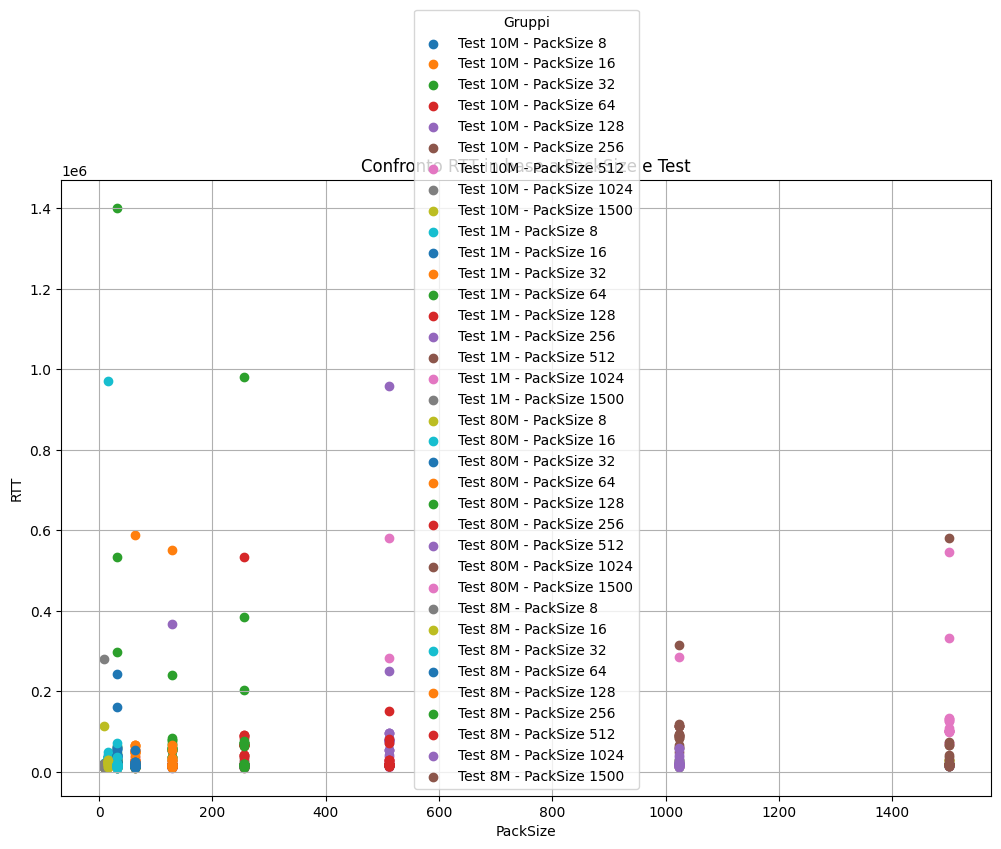

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggere i dati dal file CSV
df = pd.read_csv('Istanti_temporali.csv')

# Visualizzare il contenuto del DataFrame
print(df)

# Creare il grafico a dispersione
#plt.figure(figsize=(12, 8))

# Raggruppare i dati per 'Test' e 'PackSize'
groups = df.groupby(['Test', 'PackSize'])

# Disegnare i punti per ciascun gruppo
for (test, packsize), group in groups:
    plt.scatter(group['PackSize'], group['RTT'], label=f'Test {test} - PackSize {packsize}')

# Etichette degli assi
plt.xlabel('PackSize')
plt.ylabel('RTT')
plt.title('Confronto RTT in base a PackSize e Test')
plt.legend(title='Gruppi')
plt.grid(True)
plt.show()


       Inviato   Ricevuto  PackSize Test     RTT  Unnamed: 5
0    55.157587  55.176105         8   1M   18518         NaN
1    55.280972  55.304981        16   1M   24009         NaN
2    55.355254  55.366878        32   1M   11624         NaN
3    55.415262  55.435179        64   1M   19917         NaN
4    55.485302  55.497071       128   1M   11769         NaN
..         ...        ...       ...  ...     ...         ...
715  19.514136  19.593688       128  80M   79552         NaN
716  19.756737  19.845855       256  80M   89118         NaN
717  20.197920  20.115052       512  80M   95260         NaN
718  20.290003  20.403269      1024  80M  113266         NaN
719  20.605598  20.738202      1500  80M  132604         NaN

[720 rows x 6 columns]
                    mean            std  count
Test PackSize                                 
10M  8          16886.50    3166.755479     20
     16         24198.35    7613.936573     20
     32        135141.95  323663.569732     20
     64  

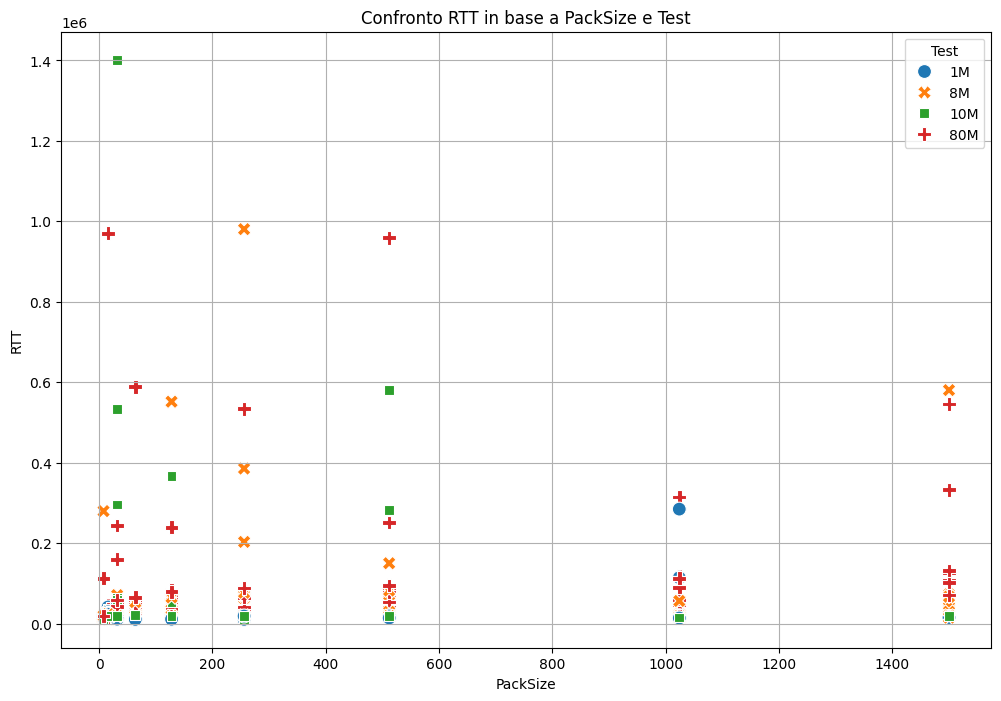

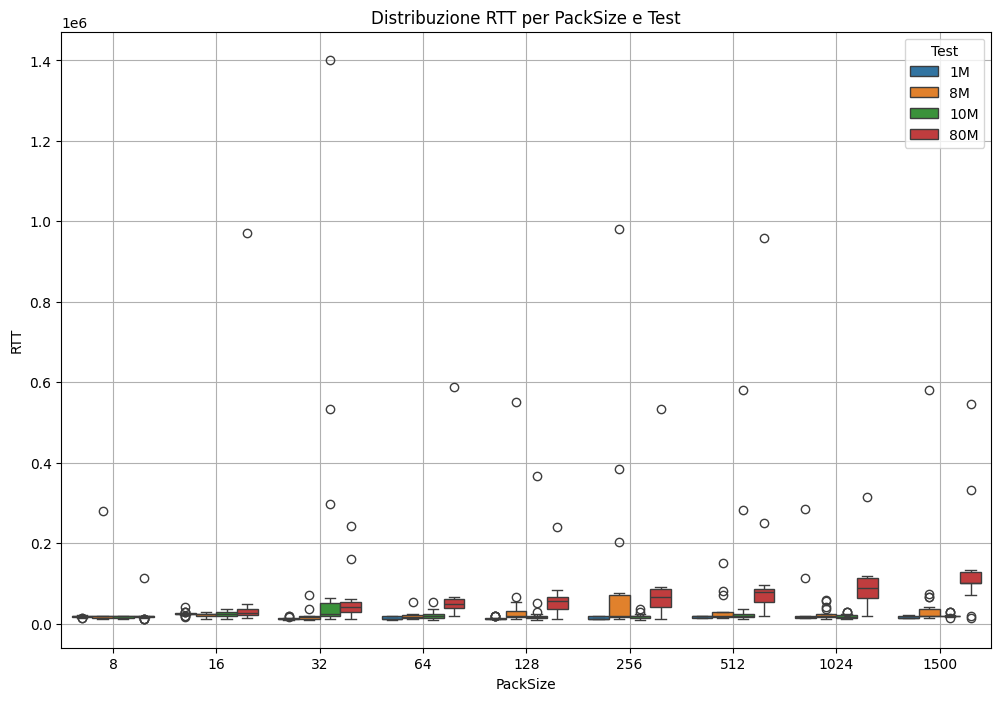

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leggere i dati dal file CSV
df = pd.read_csv('Istanti_temporali.csv')

# Visualizzare il contenuto del DataFrame
print(df)

# Calcolare statistiche descrittive
stats = df.groupby(['Test', 'PackSize'])['RTT'].agg(['mean', 'std', 'count'])
print(stats)

# Creare grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PackSize', y='RTT', hue='Test', style='Test', s=100)
plt.xlabel('PackSize')
plt.ylabel('RTT')
plt.title('Confronto RTT in base a PackSize e Test')
plt.legend(title='Test')
plt.grid(True)
plt.show()

# Creare box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PackSize', y='RTT', hue='Test')
plt.xlabel('PackSize')
plt.ylabel('RTT')
plt.title('Distribuzione RTT per PackSize e Test')
plt.legend(title='Test')
plt.grid(True)
plt.show()


  Test     mean           var       std    min      max  count
0  10M  39246.0  1.508755e+10  122831.0  10324  1401673    180
1   1M  18725.0  4.753704e+08   21803.0  10372   285040    180
2  80M  80213.0  1.527027e+10  123573.0  10827   970456    180
3   8M  40506.0  9.734855e+09   98665.0  10207   980717    180


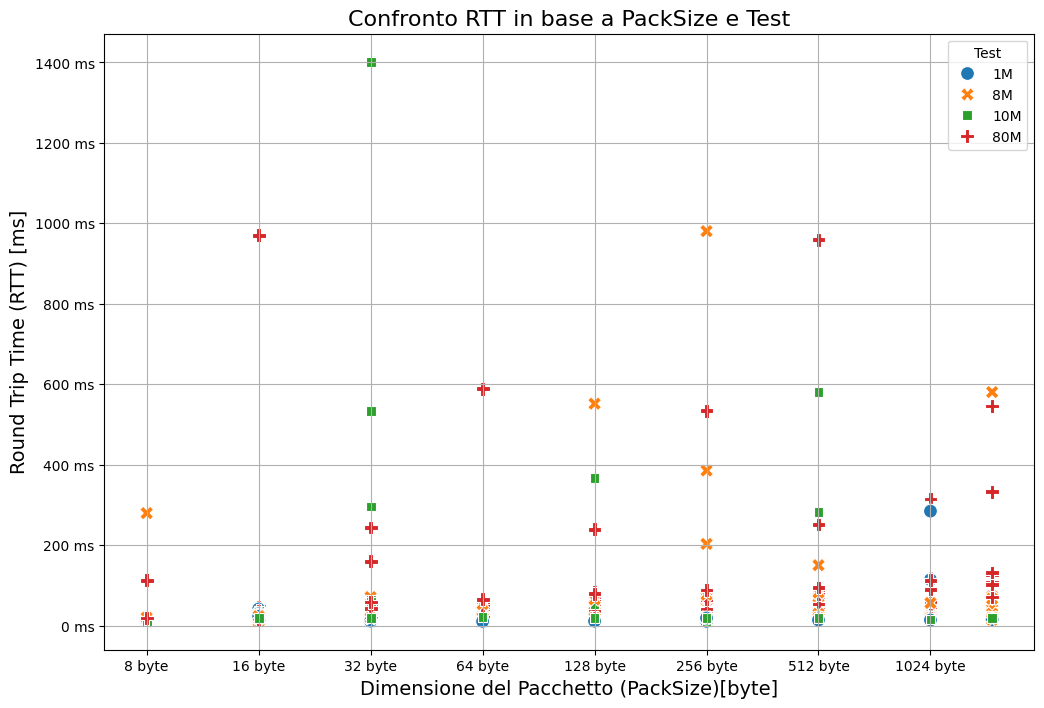

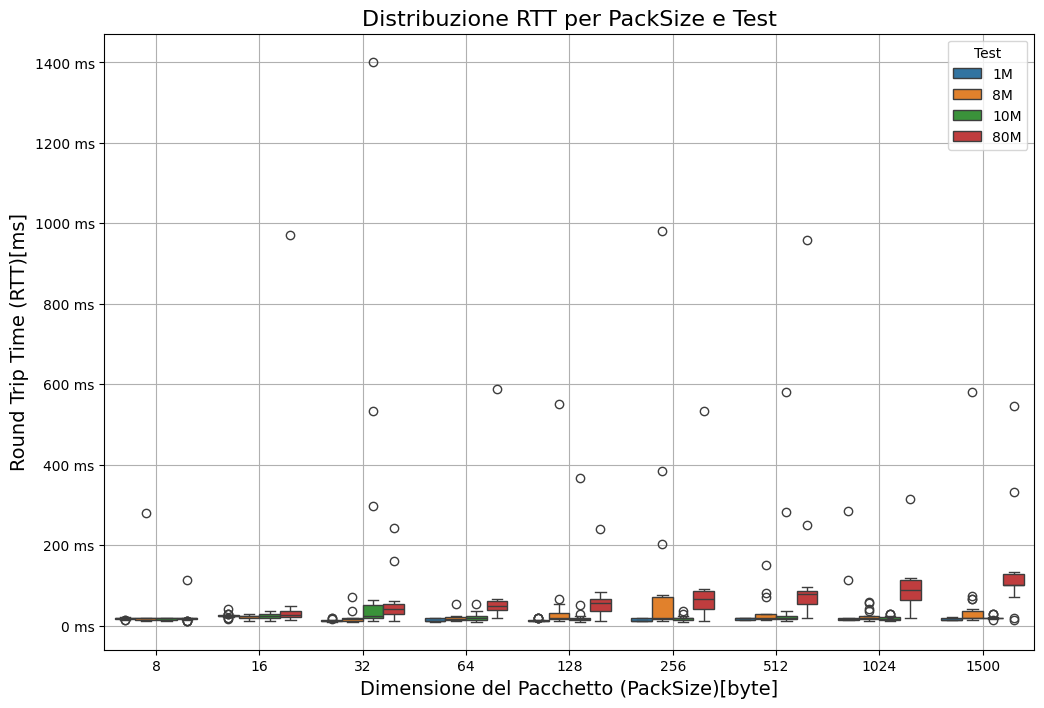

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Leggere i dati dal file CSV
df = pd.read_csv('Istanti_temporali.csv')

# Calcolare la media e la varianza del RTT per tipologia di test
stats = df.groupby('Test')['RTT'].agg(['mean', 'var','std','min','max','count']).reset_index()
stats_formatted=stats.round(0)
# Visualizzare le statistiche calcolate
print(stats_formatted)

# Funzione per formattare i tick sull'asse y
def y_fmt(x, pos):
    return f'{x*0.001:.0f} ms'
# Funzione per formattare i tick sull'asse x
def x_fmt(x, pos):
    return f'{int(x)} byte'
pack_sizes = sorted(df['PackSize'].unique())
# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PackSize', y='RTT', hue='Test', style='Test', s=100)

# Personalizzare gli assi
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base a PackSize e Test', fontsize=16)
# Impostare i tick dell'asse x usando i valori univoci di PackSize
plt.xticks(pack_sizes)
plt.xscale('log',base=2)
# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_fmt))
# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PackSize', y='RTT', hue='Test')
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per PackSize e Test', fontsize=16)

# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()
